# mosum.py: user guide

## Installation
`(.venv) $ pip install mosum`

## Generating data
We can simulate data from a mean-change model with `testdata`.
The simulated data is stored in `x`, and the signal in `mu`.

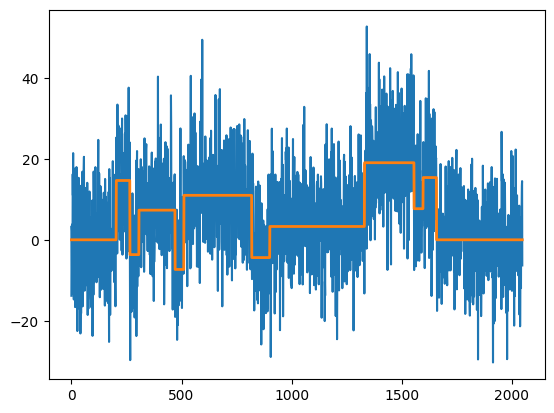

In [22]:
import mosum
sim = mosum.testData("blocks")
x = sim["x"]
from matplotlib import pyplot as plt
import pandas as pd
pd.Series(x).plot()
plt.plot(sim["mu"], '-', lw=2)
plt.show()

## MOSUM procedure

The function `mosum` uses a single bandwidth to detect changes.
This returns an object with `plot`, `print`, and `summary` methods.


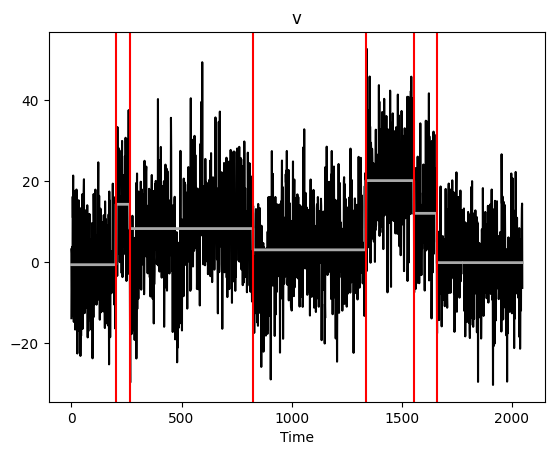

In [23]:
ms = mosum.mosum(x, G = 20)
ms.plot()
plt.show()

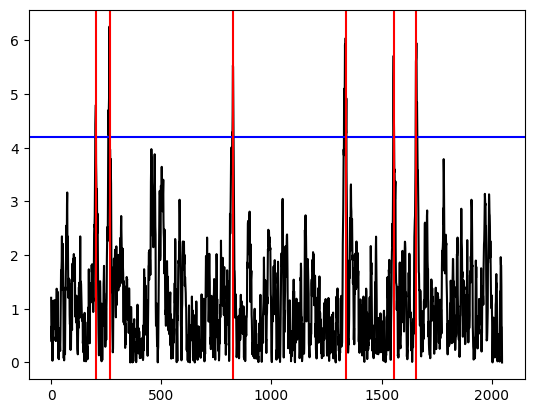

In [30]:
ms.plot(display="mosum")
plt.show()

In [24]:
ms.print()

change points detected with bandwidths (20,20) at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
   cpts  G_left  G_right  p_value   jump
0   203      20       20    0.017  1.517
1   265      20       20    0.000  1.979
2   825      20       20    0.002  1.749
3  1337      20       20    0.000  1.911
4  1555      20       20    0.001  1.807
5  1658      20       20    0.001  1.882


In [25]:
ms.summary()

change points detected at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
   cpts  G_left  G_right  p_value   jump
0   203      20       20    0.017  1.517
1   265      20       20    0.000  1.979
2   825      20       20    0.002  1.749
3  1337      20       20    0.000  1.911
4  1555      20       20    0.001  1.807
5  1658      20       20    0.001  1.882


## Multiscale MOSUM procedure with bottom-up merging

The function `multiscale_bottomUp` runs the MOSUM procedure with multiple bandwidths, merging these from smallest to largest.
Again, this returns an object with `plot`, `print`, and `summary` methods.


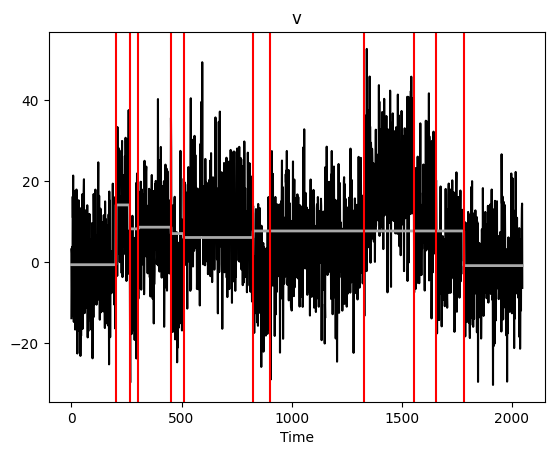

In [26]:
%%capture --no-display
ms_multi = mosum.multiscale_bottomUp(x, G = [10,20,40])
ms_multi.plot()
plt.show()

In [27]:
ms_multi.print()

change points detected with bandwidths ([10, 20, 40],[10, 20, 40]) at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
      cpts  G_left  G_right  p_value   jump
0    203.0    10.0     10.0    0.065  2.017
1    264.0    10.0     10.0    0.082  1.983
2    509.0    10.0     10.0    0.068  2.009
3   1330.0    10.0     10.0    0.016  2.215
4   1555.0    10.0     10.0    0.057  2.035
5   1657.0    10.0     10.0    0.000  2.693
6    825.0    20.0     20.0    0.002  1.749
7    304.0    40.0     40.0    0.010  1.091
8    453.0    40.0     40.0    0.001  1.296
9    901.0    40.0     40.0    0.064  0.941
10  1782.0    40.0     40.0    0.072  0.931


In [28]:
ms_multi.summary()

change points detected at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
      cpts  G_left  G_right  p_value   jump
0    203.0    10.0     10.0    0.065  2.017
1    264.0    10.0     10.0    0.082  1.983
2    509.0    10.0     10.0    0.068  2.009
3   1330.0    10.0     10.0    0.016  2.215
4   1555.0    10.0     10.0    0.057  2.035
5   1657.0    10.0     10.0    0.000  2.693
6    825.0    20.0     20.0    0.002  1.749
7    304.0    40.0     40.0    0.010  1.091
8    453.0    40.0     40.0    0.001  1.296
9    901.0    40.0     40.0    0.064  0.941
10  1782.0    40.0     40.0    0.072  0.931


## 3D visualisation

We can visualise in 3D the MOSUM detector at a range of scales, with the heights and colours of the detector corresponding to the size.

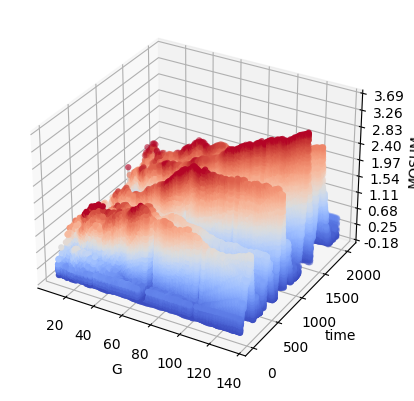

In [29]:
mosum.persp3D_multiscaleMosum(x)